In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Stock Prediction

In [2]:
df=pd.read_csv('./archive/prices.csv')

In [21]:
# Reading data from prices.csv present inside the archive folder. We got the data from Kaggle.
# Data only for years 2010-2016

# Describe the Data

In [4]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


# Check for Null Values

In [5]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [6]:
# No null vales are present in the dataset.

# Check Datatype of the features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [8]:
# Date and Symbol are of object type, rest (prices and volume) are of float type

In [9]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


# Dataframe shape

In [11]:
df.shape

(851264, 7)

In [13]:
df.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [14]:
# There are 851,264 rows and 7 columns.

In [17]:
df['symbol'].nunique()

501

In [18]:
# There are 501 unique symbols in the dataset. We will analyze for only one company i.e. Autodesk (ADSK)

# Sampling AUTODESK from the dataset
* ADSK is the NYSE stock symbol for Autodesk stocks. Let us take it for our Exploratory Analysis.

In [19]:
 df1 = df[df['symbol'] == 'ADSK']

In [20]:
df1.head()

,date,symbol,open,close,low,high,volume
263,2010-01-04,ADSK,25.610001,25.670000,25.610001,25.830000,2228600.0
730,2010-01-05,ADSK,25.620001,25.280001,25.059999,25.709999,3008800.0
1198,2010-01-06,ADSK,25.150000,25.340000,24.830000,25.520000,6638400.0
1666,2010-01-07,ADSK,25.219999,25.480000,25.110001,25.580000,4161100.0
2134,2010-01-08,ADSK,25.400000,26.260000,25.219999,26.400000,4648300.0


In [22]:
df1.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,44.621504,44.660420,44.075040,45.187440,2.918371e+06
std,12.542625,12.555376,12.447019,12.654134,1.982064e+06
min,22.980000,22.950001,22.500000,23.389999,3.555000e+05
25%,34.282500,34.350000,33.802499,34.812501,1.809975e+06
50%,41.390001,41.495001,40.914999,41.945000,2.486900e+06
75%,54.995000,54.947501,54.237500,55.542499,3.421475e+06
max,82.290001,81.739998,80.660004,83.080002,3.441910e+07


In [23]:
np.round(df1.median(),2)

open           41.39
close          41.50
low            40.91
high           41.94
volume    2486900.00
dtype: float64

* All the median values (open,close,low,high) are less than mean, meaning that
the data is right skewed.

In [24]:
df1['date']=pd.to_datetime(df1['date'])

In [25]:
print("Minimum date value : {}".format(df1['date'].min()))
print("Maximum date value : {}".format(df1['date'].max()))

Minimum date value : 2010-01-04 00:00:00
Maximum date value : 2016-12-30 00:00:00


* We have data from starting of January 2010 to December of 2016 so around 7 years of data.

# EDA

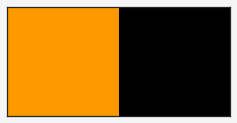

In [26]:
#importing ploting libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
colors = ['#FF9900','#000000']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})
sns.palplot(colors, size=2)

Text(0.5, 1.0, 'AUTODESK Stock value changes since 2010')

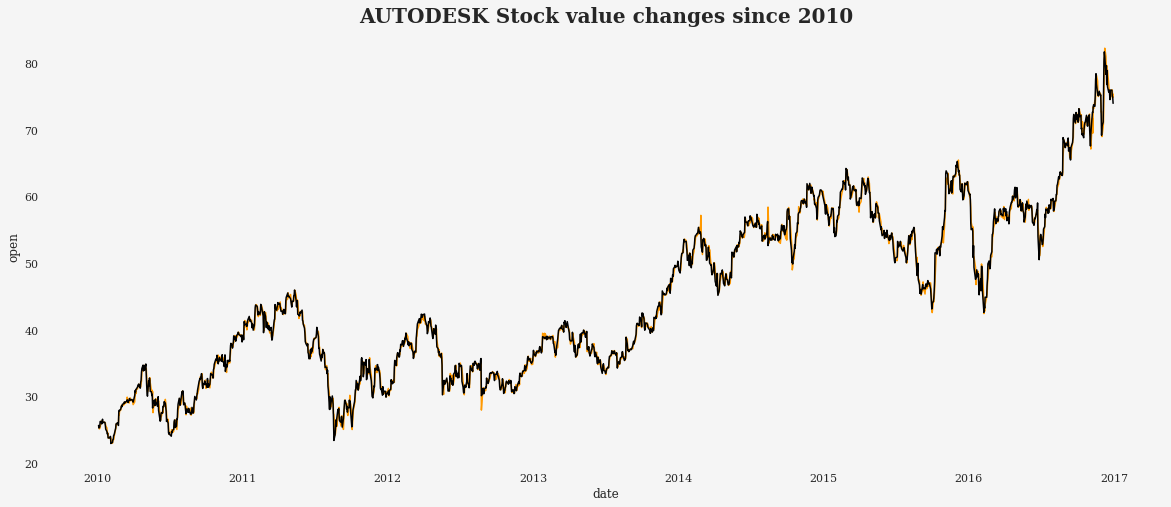

In [39]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=df1, x='date',y='open')
ax=sns.lineplot(data=df1, x='date',y='close', color=colors[1]);
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)

plt.title("AUTODESK Stock value changes since 2010", size=20, weight='bold')

## We can see that stock was trading for around 25 dollars in 2010 and reached around 80 dollars in 2017, giving more than 3x return. Let us see the stock volume for Autodesk as well and compare the progress to another company as well, let's say Nvidia (NVDA)

Text(0.5, 1.0, 'Autodesk Stock volume')

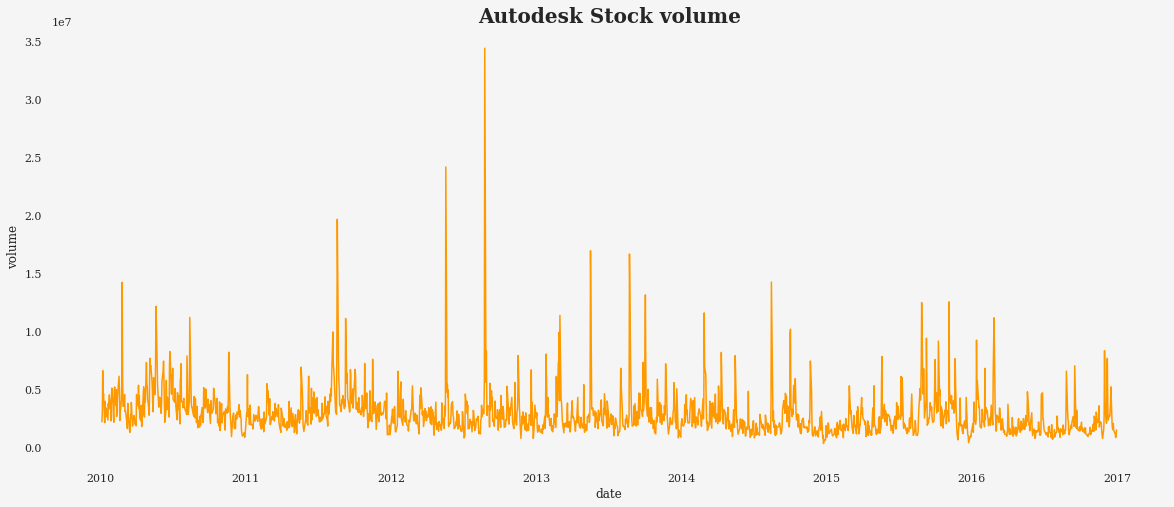

In [40]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=df1, x='date',y='volume')
#ax2=sns.lineplot(data=df1, x='date',y='close', color=colors[1]);
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)
plt.title("Autodesk Stock volume", size=20, weight='bold')

Text(0.5, 1.0, 'NVIDIA Stock value changes since 2010')

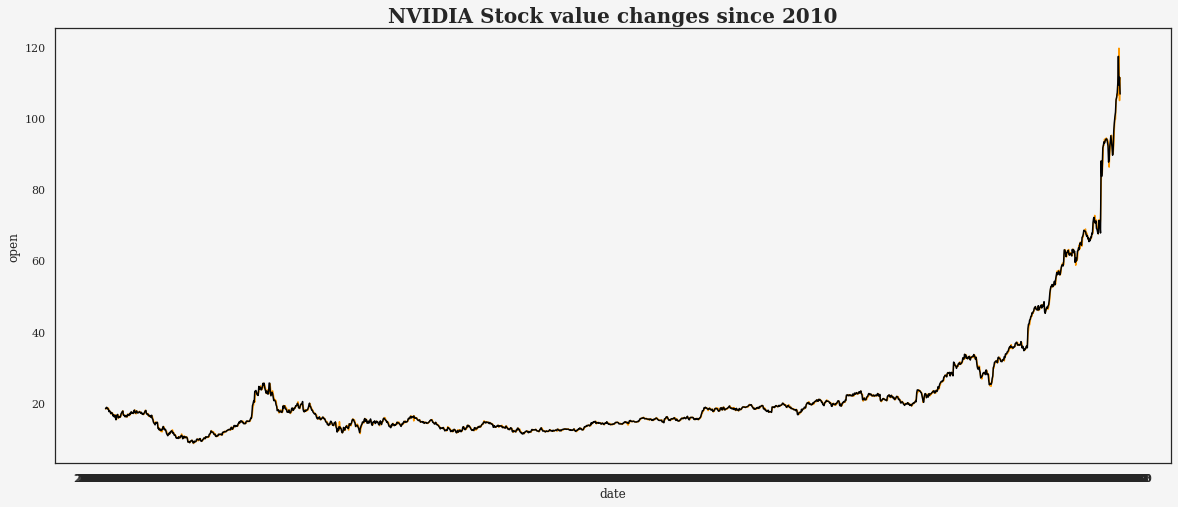

In [41]:
df2=df[df['symbol']=='NVDA']
fig=plt.figure(figsize=(20,8))
ax1=sns.lineplot(data=df2, x='date',y='open')
ax1=sns.lineplot(data=df2, x='date',y='close', color=colors[1]);
for s in ['left','right','top','bottom']:
    ax1.spines[s].set_visible(True)

plt.title("NVIDIA Stock value changes since 2010", size=20, weight='bold')

Text(0.5, 1.0, 'Nvidia Stock volume')

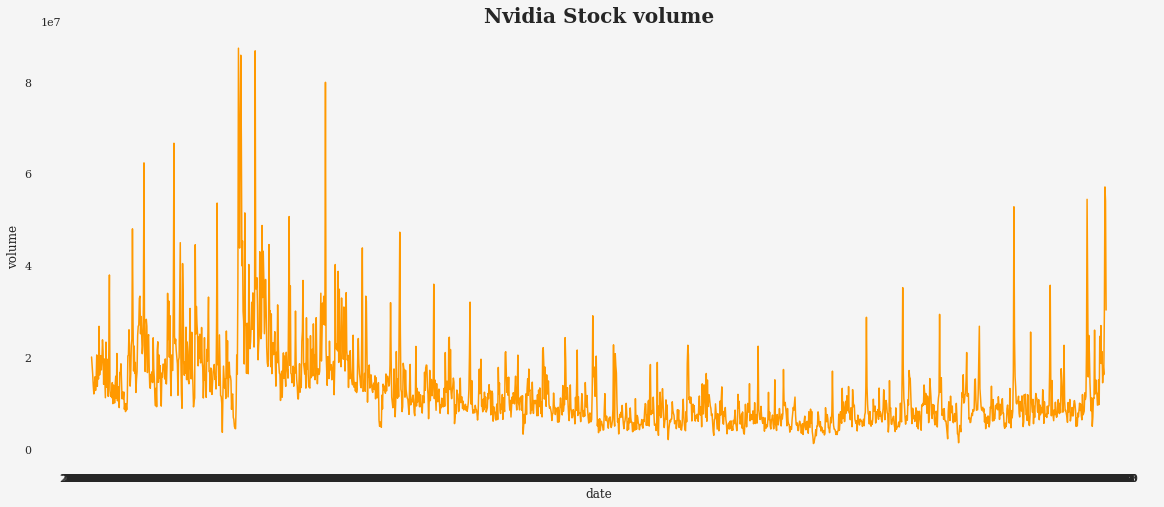

In [42]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=df2, x='date',y='volume')
#ax=sns.lineplot(data=df2, x='date',y='close', color=colors[1]);
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)
plt.title("Nvidia Stock volume", size=20, weight='bold')

### Trading volume is a measure of how much a given financial asset has traded in a period of time. The thing to notice here is that Nvidia's share price surged more than 3x in 2016. This could have been due to the launch of NVIDIA's Pascal graphics cards, which included the high-end GTX 1080 and GTX 1070, and also mainstream and cheaper GTX 1060, GTX 1050 Ti, and GTX 1050.